In [21]:
import pandas as pd
import pymysql
import numpy as np
from sqlalchemy import create_engine

In [22]:
## 加上字符集参数，防止中文乱码
dbconn = pymysql.connect(
    host="localhost",  # 127.0.0.1
    database="gongdan",
    user="root",
    password="root",
    port=3306,
    charset='utf8'
)

In [23]:
table = "country_data_import"
# sql语句
sqlcmd = "select * from " + table

# 利用pandas 模块导入mysql数据
df = pd.read_sql(sqlcmd, dbconn)

In [24]:
print(df.dtypes)

COUNTRY          object
TIME             object
YEAR             object
MONTH            object
USD              object
RMB              object
ANALYSIS_TIME    object
ANALYST          object
DELETE_TAG       object
DELETE_TIME      object
REMARKS          object
dtype: object


In [25]:
df["USD"] = pd.to_numeric(df["USD"])
df["RMB"] = pd.to_numeric(df["RMB"])
print(df.dtypes)

COUNTRY           object
TIME              object
YEAR              object
MONTH             object
USD              float64
RMB              float64
ANALYSIS_TIME     object
ANALYST           object
DELETE_TAG        object
DELETE_TIME       object
REMARKS           object
dtype: object


In [30]:
# df3 = pd.pivot_table(df, values=['USD'], index='YEAR', columns='COUNTRY', aggfunc=np.sum)
df3 = pd.pivot_table(df, values=['USD'], index=['YEAR'],columns=['COUNTRY'], aggfunc=np.sum)
df3

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="21" halign="left">USD</th>
    </tr>
    <tr>
      <th>COUNTRY</th>
      <th>不丹</th>
      <th>东帝汶</th>
      <th>中国</th>
      <th>中非</th>
      <th>丹麦</th>
      <th>乌克兰</th>
      <th>乌兹别克斯坦</th>
      <th>乌干达</th>
      <th>乌拉圭</th>
      <th>乍得</th>
      <th>...</th>
      <th>马尔代夫</th>
      <th>马拉维</th>
      <th>马来西亚</th>
      <th>马约特</th>
      <th>马绍尔群岛</th>
      <th>马耳他</th>
      <th>马达加斯加</th>
      <th>马里</th>
      <th>黎巴嫩</th>
      <th>黑山</th>
    </tr>
    <tr>
      <th>YEAR</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015</th>
      <td>553.0</td>
      <td>15365.0</td>
      <td>1.895198e+09</td>
      <td>NaN</td>
      <td>217477406.0</td>
      <td>261739787.0</td>
      <td>28689382.0</td>
      <td>11718943.0</td>
      <td>400705049.0</td>
      <td>514956.0</td>
      <td>...</td>
      <td>NaN</td>
      <td>54780.0</td>
      <td>5.924351e+09</td>
      <td>NaN</td>
      <td>22555417.0</td>
      <td>4947713.0</td>
      <td>9707913.0</td>
      <td>24767154.0</td>
      <td>439097.0</td>
      <td>13676777.0</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>NaN</td>
      <td>840.0</td>
      <td>2.404726e+09</td>
      <td>114445.0</td>
      <td>208200636.0</td>
      <td>142585341.0</td>
      <td>87890626.0</td>
      <td>1359962.0</td>
      <td>224481567.0</td>
      <td>91058640.0</td>
      <td>...</td>
      <td>486.0</td>
      <td>56736.0</td>
      <td>3.761051e+09</td>
      <td>NaN</td>
      <td>16148550.0</td>
      <td>2651066.0</td>
      <td>1370544.0</td>
      <td>11659833.0</td>
      <td>857605.0</td>
      <td>27245868.0</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>NaN</td>
      <td>23.0</td>
      <td>2.367868e+09</td>
      <td>500.0</td>
      <td>164438465.0</td>
      <td>147127015.0</td>
      <td>76097573.0</td>
      <td>1380597.0</td>
      <td>406283284.0</td>
      <td>223425832.0</td>
      <td>...</td>
      <td>221828.0</td>
      <td>12.0</td>
      <td>5.922618e+09</td>
      <td>52.0</td>
      <td>18044500.0</td>
      <td>3497618.0</td>
      <td>3329135.0</td>
      <td>8280972.0</td>
      <td>794163.0</td>
      <td>55575048.0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>2.029111e+09</td>
      <td>NaN</td>
      <td>148418649.0</td>
      <td>320194244.0</td>
      <td>59121743.0</td>
      <td>3417595.0</td>
      <td>368331938.0</td>
      <td>92931455.0</td>
      <td>...</td>
      <td>114735.0</td>
      <td>49400.0</td>
      <td>2.949214e+09</td>
      <td>NaN</td>
      <td>22865535.0</td>
      <td>5448337.0</td>
      <td>1962358.0</td>
      <td>13254282.0</td>
      <td>988503.0</td>
      <td>12022189.0</td>
    </tr>
    <tr>
      <th>2019</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>9.508145e+08</td>
      <td>NaN</td>
      <td>90751024.0</td>
      <td>172033367.0</td>
      <td>17234721.0</td>
      <td>3381413.0</td>
      <td>143684068.0</td>
      <td>126612333.0</td>
      <td>...</td>
      <td>NaN</td>
      <td>159613.0</td>
      <td>1.423669e+09</td>
      <td>NaN</td>
      <td>11260293.0</td>
      <td>3547804.0</td>
      <td>4204887.0</td>
      <td>18550238.0</td>
      <td>271509.0</td>
      <td>35.0</td>


In [31]:
# df3 = pd.pivot_table(df, values=['USD'], index='YEAR', columns='COUNTRY', aggfunc=np.sum)
# df1 = pd.pivot_table(df, values=['USD'], index='YEAR', columns='COUNTRY', aggfunc=np.sum)

In [32]:
df1 = pd.pivot_table(df, values=['USD'], index='YEAR', columns='COUNTRY', aggfunc=np.sum)
df1.sort_values(axis=1, by="2019", ascending=False)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="21" halign="left">USD</th>
    </tr>
    <tr>
      <th>COUNTRY</th>
      <th>巴西</th>
      <th>韩国</th>
      <th>俄罗斯联邦</th>
      <th>澳大利亚</th>
      <th>安哥拉</th>
      <th>日本</th>
      <th>阿曼</th>
      <th>美国</th>
      <th>泰国</th>
      <th>马来西亚</th>
      <th>...</th>
      <th>瓦努阿图</th>
      <th>留尼汪</th>
      <th>百慕大</th>
      <th>科摩罗</th>
      <th>萨摩亚</th>
      <th>西撒哈拉</th>
      <th>阿鲁巴</th>
      <th>非洲其他国家(地区)</th>
      <th>马尔代夫</th>
      <th>马约特</th>
    </tr>
    <tr>
      <th>YEAR</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015</th>
      <td>6.277318e+09</td>
      <td>1.765106e+10</td>
      <td>2.442870e+09</td>
      <td>7.698789e+09</td>
      <td>5.467397e+08</td>
      <td>5.249926e+09</td>
      <td>9.708810e+08</td>
      <td>8.926140e+09</td>
      <td>4.401381e+09</td>
      <td>5.924351e+09</td>
      <td>...</td>
      <td>2722233.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1152.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>6.773691e+09</td>
      <td>1.449959e+10</td>
      <td>3.887636e+09</td>
      <td>7.271312e+09</td>
      <td>2.319419e+09</td>
      <td>5.308697e+09</td>
      <td>2.308552e+09</td>
      <td>7.699958e+09</td>
      <td>3.863311e+09</td>
      <td>3.761051e+09</td>
      <td>...</td>
      <td>10338.0</td>
      <td>NaN</td>
      <td>5767.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>7.0</td>
      <td>486.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>9.127160e+09</td>
      <td>1.342326e+10</td>
      <td>6.290998e+09</td>
      <td>8.553843e+09</td>
      <td>5.186292e+09</td>
      <td>5.378753e+09</td>
      <td>2.204657e+09</td>
      <td>8.018782e+09</td>
      <td>4.885277e+09</td>
      <td>5.922618e+09</td>
      <td>...</td>
      <td>4286975.0</td>
      <td>52.0</td>
      <td>43.0</td>
      <td>3594.0</td>
      <td>1017.0</td>
      <td>44.0</td>
      <td>1801.0</td>
      <td>420791.0</td>
      <td>221828.0</td>
      <td>52.0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>1.597414e+10</td>
      <td>1.341438e+10</td>
      <td>1.031207e+10</td>
      <td>8.669261e+09</td>
      <td>7.108834e+09</td>
      <td>5.096477e+09</td>
      <td>2.808612e+09</td>
      <td>6.529600e+09</td>
      <td>4.493785e+09</td>
      <td>2.949214e+09</td>
      <td>...</td>
      <td>3402204.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>114735.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2019</th>
      <td>7.611603e+09</td>
      <td>5.145898e+09</td>
      <td>4.287466e+09</td>
      <td>3.532456e+09</td>
      <td>3.445000e+09</td>
      <td>1.839699e+09</td>
      <td>1.717988e+09</td>
      <td>1.705540e+09</td>
      <td>1.652632e+09</td>
      <td>1.423669e+09</td>
      <td>...</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</tab

In [33]:
df1.sort_values(axis = 1, by='2019',ascending=False).iloc[4, 0:10]

     COUNTRY
USD  巴西         7.611603e+09
     韩国         5.145898e+09
     俄罗斯联邦      4.287466e+09
     澳大利亚       3.532456e+09
     安哥拉        3.445000e+09
     日本         1.839699e+09
     阿曼         1.717988e+09
     美国         1.705540e+09
     泰国         1.652632e+09
     马来西亚       1.423669e+09
Name: 2019, dtype: float64

In [34]:
df3.sort_values(axis = 1, by='2019',ascending=True)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="21" halign="left">USD</th>
    </tr>
    <tr>
      <th>COUNTRY</th>
      <th>黑山</th>
      <th>多米尼克</th>
      <th>澳门</th>
      <th>摩纳哥</th>
      <th>圣马力诺</th>
      <th>安道尔</th>
      <th>列支敦士登</th>
      <th>吉尔吉斯斯坦</th>
      <th>尼加拉瓜</th>
      <th>莱索托</th>
      <th>...</th>
      <th>瓦努阿图</th>
      <th>留尼汪</th>
      <th>百慕大</th>
      <th>科摩罗</th>
      <th>萨摩亚</th>
      <th>西撒哈拉</th>
      <th>阿鲁巴</th>
      <th>非洲其他国家(地区)</th>
      <th>马尔代夫</th>
      <th>马约特</th>
    </tr>
    <tr>
      <th>YEAR</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015</th>
      <td>13676777.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>43845.0</td>
      <td>16078.0</td>
      <td>NaN</td>
      <td>1770566.0</td>
      <td>19533843.0</td>
      <td>2679834.0</td>
      <td>428749.0</td>
      <td>...</td>
      <td>2722233.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1152.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>27245868.0</td>
      <td>NaN</td>
      <td>59599.0</td>
      <td>10845.0</td>
      <td>16903.0</td>
      <td>NaN</td>
      <td>454670.0</td>
      <td>190253.0</td>
      <td>1510819.0</td>
      <td>1283072.0</td>
      <td>...</td>
      <td>10338.0</td>
      <td>NaN</td>
      <td>5767.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>7.0</td>
      <td>486.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>55575048.0</td>
      <td>NaN</td>
      <td>43970.0</td>
      <td>8922.0</td>
      <td>90065.0</td>
      <td>23724.0</td>
      <td>4.0</td>
      <td>285344.0</td>
      <td>5051157.0</td>
      <td>842350.0</td>
      <td>...</td>
      <td>4286975.0</td>
      <td>52.0</td>
      <td>43.0</td>
      <td>3594.0</td>
      <td>1017.0</td>
      <td>44.0</td>
      <td>1801.0</td>
      <td>420791.0</td>
      <td>221828.0</td>
      <td>52.0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>12022189.0</td>
      <td>NaN</td>
      <td>8005.0</td>
      <td>7465.0</td>
      <td>17508.0</td>
      <td>95082.0</td>
      <td>13456.0</td>
      <td>436580.0</td>
      <td>1225324.0</td>
      <td>254045.0</td>
      <td>...</td>
      <td>3402204.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>114735.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2019</th>
      <td>35.0</td>
      <td>126.0</td>
      <td>749.0</td>
      <td>995.0</td>
      <td>3572.0</td>
      <td>4067.0</td>
      <td>5645.0</td>
      <td>7420.0</td>
      <td>8228.0</td>
      <td>11070.0</td>
      <td>...</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
<p>5 rows × 215 columns</p>
</div>

In [35]:
df3.sort_values(axis = 1, by='2019',ascending=False).iloc[4, 0:10]

     COUNTRY
USD  巴西         7.611603e+09
     韩国         5.145898e+09
     俄罗斯联邦      4.287466e+09
     澳大利亚       3.532456e+09
     安哥拉        3.445000e+09
     日本         1.839699e+09
     阿曼         1.717988e+09
     美国         1.705540e+09
     泰国         1.652632e+09
     马来西亚       1.423669e+09
Name: 2019, dtype: float64

In [27]:
def country_ana_3():
    """
    :return:
    """
    df = pd.read_csv('/Users/sunlu/Downloads/country_data_import.csv', encoding='utf-8')
    df1 = pd.pivot_table(df, values=['USD'], index='YEAR', columns='COUNTRY', aggfunc=np.sum)
    # 按行求和
    dfsum = list(df1.apply(lambda x: x.sum(), axis=1))
    print(dfsum)

    df2015 = df1.sort_values(axis=1, by=2015, ascending=False).iloc[0, 0:10] / dfsum[0]
    # print(df2015)

    df2016 = df1.sort_values(axis=1, by=2016, ascending=False).iloc[1, 0:10] / dfsum[1]
    # print(df2016)

    df2017 = df1.sort_values(axis=1, by=2017, ascending=False).iloc[2, 0:10] / dfsum[2]
    # print(df2017)

    df2018 = df1.sort_values(axis=1, by=2018, ascending=False).iloc[3, 0:10] / dfsum[3]
    # print(df2018)

    df2019 = df1.sort_values(axis=1, by=2019, ascending=False).iloc[4, 0:10] / dfsum[4]
    print(df2019)
    
    # df2019.reset_index(drop=True, inplace=True)
    # print(df2019)
    # df2019.to_csv('../data/国家/功能1.3/country_data_import_2015.csv', encoding='gbk')
    # df = pd.read_csv('../data/国家/功能1.3/country_import_USD_top_2015.csv', encoding='gbk', index_col='TIME')
    # print(df.T)
    df2019.T.plot.pie(figsize=(5, 5), subplots=True, colors=['#808080', '#B22222', '#FF7F50', '#FFF8DC',
                                                           '#008000', '#40E0D0', '#00BFFF', '#708090',
                                                           '#BA55D3', '#C71585', '#FFC0CB'])
    plt.legend(loc='best')
    plt.show()

[96682122060.0, 97263495347.0, 117513492280.0, 132281252981.0, 54734040734.0]
     COUNTRY
USD  巴西         0.139065
     韩国         0.094016
     俄罗斯联邦      0.078333
     澳大利亚       0.064539
     安哥拉        0.062941
     日本         0.033612
     阿曼         0.031388
     美国         0.031161
     泰国         0.030194
     马来西亚       0.026011
Name: 2019, dtype: float64


NameError: name 'plt' is not defined

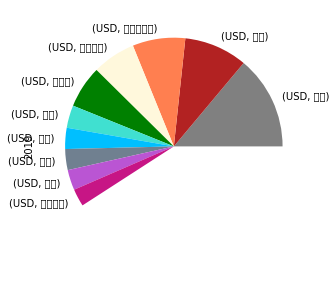

In [26]:
country_ana_3()

In [7]:
df = pd.read_csv('/Users/sunlu/Downloads/country_data_import.csv', encoding='utf-8')
df1 = pd.pivot_table(df, values=['USD'], index='YEAR', columns='COUNTRY', aggfunc=np.sum)

In [41]:
df.iloc[0:1,0:1]

,COUNTRY
0,不丹


In [9]:
df1.sort_values(axis=1, by=2019, ascending=False)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="21" halign="left">USD</th>
    </tr>
    <tr>
      <th>COUNTRY</th>
      <th>巴西</th>
      <th>韩国</th>
      <th>俄罗斯联邦</th>
      <th>澳大利亚</th>
      <th>安哥拉</th>
      <th>日本</th>
      <th>阿曼</th>
      <th>美国</th>
      <th>泰国</th>
      <th>马来西亚</th>
      <th>...</th>
      <th>瓦努阿图</th>
      <th>留尼汪</th>
      <th>百慕大</th>
      <th>科摩罗</th>
      <th>萨摩亚</th>
      <th>西撒哈拉</th>
      <th>阿鲁巴</th>
      <th>非洲其他国家(地区)</th>
      <th>马尔代夫</th>
      <th>马约特</th>
    </tr>
    <tr>
      <th>YEAR</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015</th>
      <td>6.277318e+09</td>
      <td>1.765106e+10</td>
      <td>2.442870e+09</td>
      <td>7.698789e+09</td>
      <td>5.467397e+08</td>
      <td>5.249926e+09</td>
      <td>9.708810e+08</td>
      <td>8.926140e+09</td>
      <td>4.401381e+09</td>
      <td>5.924351e+09</td>
      <td>...</td>
      <td>2722233.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1152.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>6.773691e+09</td>
      <td>1.449959e+10</td>
      <td>3.887636e+09</td>
      <td>7.271312e+09</td>
      <td>2.319419e+09</td>
      <td>5.308697e+09</td>
      <td>2.308552e+09</td>
      <td>7.699958e+09</td>
      <td>3.863311e+09</td>
      <td>3.761051e+09</td>
      <td>...</td>
      <td>10338.0</td>
      <td>NaN</td>
      <td>5767.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>7.0</td>
      <td>486.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>9.127160e+09</td>
      <td>1.342326e+10</td>
      <td>6.290998e+09</td>
      <td>8.553843e+09</td>
      <td>5.186292e+09</td>
      <td>5.378753e+09</td>
      <td>2.204657e+09</td>
      <td>8.018782e+09</td>
      <td>4.885277e+09</td>
      <td>5.922618e+09</td>
      <td>...</td>
      <td>4286975.0</td>
      <td>52.0</td>
      <td>43.0</td>
      <td>3594.0</td>
      <td>1017.0</td>
      <td>44.0</td>
      <td>1801.0</td>
      <td>420791.0</td>
      <td>221828.0</td>
      <td>52.0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>1.597414e+10</td>
      <td>1.341438e+10</td>
      <td>1.031207e+10</td>
      <td>8.669261e+09</td>
      <td>7.108834e+09</td>
      <td>5.096477e+09</td>
      <td>2.808612e+09</td>
      <td>6.529600e+09</td>
      <td>4.493785e+09</td>
      <td>2.949214e+09</td>
      <td>...</td>
      <td>3402204.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>114735.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2019</th>
      <td>7.611603e+09</td>
      <td>5.145898e+09</td>
      <td>4.287466e+09</td>
      <td>3.532456e+09</td>
      <td>3.445000e+09</td>
      <td>1.839699e+09</td>
      <td>1.717988e+09</td>
      <td>1.705540e+09</td>
      <td>1.652632e+09</td>
      <td>1.423669e+09</td>
      <td>...</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</tab

In [29]:
df1

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="21" halign="left">USD</th>
    </tr>
    <tr>
      <th>COUNTRY</th>
      <th>不丹</th>
      <th>东帝汶</th>
      <th>中国</th>
      <th>中非</th>
      <th>丹麦</th>
      <th>乌克兰</th>
      <th>乌兹别克斯坦</th>
      <th>乌干达</th>
      <th>乌拉圭</th>
      <th>乍得</th>
      <th>...</th>
      <th>马尔代夫</th>
      <th>马拉维</th>
      <th>马来西亚</th>
      <th>马约特</th>
      <th>马绍尔群岛</th>
      <th>马耳他</th>
      <th>马达加斯加</th>
      <th>马里</th>
      <th>黎巴嫩</th>
      <th>黑山</th>
    </tr>
    <tr>
      <th>YEAR</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015</th>
      <td>553.0</td>
      <td>15365.0</td>
      <td>1.895198e+09</td>
      <td>NaN</td>
      <td>217477406.0</td>
      <td>261739787.0</td>
      <td>28689382.0</td>
      <td>11718943.0</td>
      <td>400705049.0</td>
      <td>514956.0</td>
      <td>...</td>
      <td>NaN</td>
      <td>54780.0</td>
      <td>5.924351e+09</td>
      <td>NaN</td>
      <td>22555417.0</td>
      <td>4947713.0</td>
      <td>9707913.0</td>
      <td>24767154.0</td>
      <td>439097.0</td>
      <td>13676777.0</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>NaN</td>
      <td>840.0</td>
      <td>2.404726e+09</td>
      <td>114445.0</td>
      <td>208200636.0</td>
      <td>142585341.0</td>
      <td>87890626.0</td>
      <td>1359962.0</td>
      <td>224481567.0</td>
      <td>91058640.0</td>
      <td>...</td>
      <td>486.0</td>
      <td>56736.0</td>
      <td>3.761051e+09</td>
      <td>NaN</td>
      <td>16148550.0</td>
      <td>2651066.0</td>
      <td>1370544.0</td>
      <td>11659833.0</td>
      <td>857605.0</td>
      <td>27245868.0</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>NaN</td>
      <td>23.0</td>
      <td>2.367868e+09</td>
      <td>500.0</td>
      <td>164438465.0</td>
      <td>147127015.0</td>
      <td>76097573.0</td>
      <td>1380597.0</td>
      <td>406283284.0</td>
      <td>223425832.0</td>
      <td>...</td>
      <td>221828.0</td>
      <td>12.0</td>
      <td>5.922618e+09</td>
      <td>52.0</td>
      <td>18044500.0</td>
      <td>3497618.0</td>
      <td>3329135.0</td>
      <td>8280972.0</td>
      <td>794163.0</td>
      <td>55575048.0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>2.029111e+09</td>
      <td>NaN</td>
      <td>148418649.0</td>
      <td>320194244.0</td>
      <td>59121743.0</td>
      <td>3417595.0</td>
      <td>368331938.0</td>
      <td>92931455.0</td>
      <td>...</td>
      <td>114735.0</td>
      <td>49400.0</td>
      <td>2.949214e+09</td>
      <td>NaN</td>
      <td>22865535.0</td>
      <td>5448337.0</td>
      <td>1962358.0</td>
      <td>13254282.0</td>
      <td>988503.0</td>
      <td>12022189.0</td>
    </tr>
    <tr>
      <th>2019</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>9.508145e+08</td>
      <td>NaN</td>
      <td>90751024.0</td>
      <td>172033367.0</td>
      <td>17234721.0</td>
      <td>3381413.0</td>
      <td>143684068.0</td>
      <td>126612333.0</td>
      <td>...</td>
      <td>NaN</td>
      <td>159613.0</td>
      <td>1.423669e+09</td>
      <td>NaN</td>
      <td>11260293.0</td>
      <td>3547804.0</td>
      <td>4204887.0</td>
      <td>18550238.0</td>
      <td>271509.0</td>
      <td>35.0</td>


In [31]:
# 按行求和
dfsum = list(df1.apply(lambda x: x.sum(), axis=1))
print(df1.apply(lambda x: x.sum(), axis=1))
print("===============")
print(dfsum)

YEAR
2015    9.668212e+10
2016    9.726350e+10
2017    1.175135e+11
2018    1.322813e+11
2019    5.473404e+10
dtype: float64
[96682122060.0, 97263495347.0, 117513492280.0, 132281252981.0, 54734040734.0]


In [34]:
df2019 = df1.sort_values(axis=1, by=2019, ascending=False)#.iloc[4, 0:10] #/ dfsum[4]
df2019

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="21" halign="left">USD</th>
    </tr>
    <tr>
      <th>COUNTRY</th>
      <th>巴西</th>
      <th>韩国</th>
      <th>俄罗斯联邦</th>
      <th>澳大利亚</th>
      <th>安哥拉</th>
      <th>日本</th>
      <th>阿曼</th>
      <th>美国</th>
      <th>泰国</th>
      <th>马来西亚</th>
      <th>...</th>
      <th>瓦努阿图</th>
      <th>留尼汪</th>
      <th>百慕大</th>
      <th>科摩罗</th>
      <th>萨摩亚</th>
      <th>西撒哈拉</th>
      <th>阿鲁巴</th>
      <th>非洲其他国家(地区)</th>
      <th>马尔代夫</th>
      <th>马约特</th>
    </tr>
    <tr>
      <th>YEAR</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2015</th>
      <td>6.277318e+09</td>
      <td>1.765106e+10</td>
      <td>2.442870e+09</td>
      <td>7.698789e+09</td>
      <td>5.467397e+08</td>
      <td>5.249926e+09</td>
      <td>9.708810e+08</td>
      <td>8.926140e+09</td>
      <td>4.401381e+09</td>
      <td>5.924351e+09</td>
      <td>...</td>
      <td>2722233.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1152.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>6.773691e+09</td>
      <td>1.449959e+10</td>
      <td>3.887636e+09</td>
      <td>7.271312e+09</td>
      <td>2.319419e+09</td>
      <td>5.308697e+09</td>
      <td>2.308552e+09</td>
      <td>7.699958e+09</td>
      <td>3.863311e+09</td>
      <td>3.761051e+09</td>
      <td>...</td>
      <td>10338.0</td>
      <td>NaN</td>
      <td>5767.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>7.0</td>
      <td>486.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>9.127160e+09</td>
      <td>1.342326e+10</td>
      <td>6.290998e+09</td>
      <td>8.553843e+09</td>
      <td>5.186292e+09</td>
      <td>5.378753e+09</td>
      <td>2.204657e+09</td>
      <td>8.018782e+09</td>
      <td>4.885277e+09</td>
      <td>5.922618e+09</td>
      <td>...</td>
      <td>4286975.0</td>
      <td>52.0</td>
      <td>43.0</td>
      <td>3594.0</td>
      <td>1017.0</td>
      <td>44.0</td>
      <td>1801.0</td>
      <td>420791.0</td>
      <td>221828.0</td>
      <td>52.0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>1.597414e+10</td>
      <td>1.341438e+10</td>
      <td>1.031207e+10</td>
      <td>8.669261e+09</td>
      <td>7.108834e+09</td>
      <td>5.096477e+09</td>
      <td>2.808612e+09</td>
      <td>6.529600e+09</td>
      <td>4.493785e+09</td>
      <td>2.949214e+09</td>
      <td>...</td>
      <td>3402204.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>114735.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2019</th>
      <td>7.611603e+09</td>
      <td>5.145898e+09</td>
      <td>4.287466e+09</td>
      <td>3.532456e+09</td>
      <td>3.445000e+09</td>
      <td>1.839699e+09</td>
      <td>1.717988e+09</td>
      <td>1.705540e+09</td>
      <td>1.652632e+09</td>
      <td>1.423669e+09</td>
      <td>...</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</tab